# ABOUT THE PROJECT
### The [dataset](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) are related to red and white variants of the Portuguese "Vinho Verde" wine. We can develop classifications and regression algorithms with this dataset, in this project, I will use classifications algorithms (SVM, KNN and Random Forest) to predict the quality of the wine based on the listed features. 

## Inputs

- fixed acidity

- volatile acidity

- citric acid

- residual sugar

- chlorides

- free sulfur dioxide

- total sulfur dioxide

- density

- pH

- sulphates

- alcohol

## Output
- quality



In [1]:
#imports to EDA 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import the machine learning algorithms and data_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

#import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
#first of all, let's see our dataset
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# EXPLORATORY DATA ANALYSIS 

### - First of all, let's see how is the distribution of our possible targets
### - Then a heatmap to see how the features are correlated.
### - Finally, we will analyze in more depth the theoretically most influential features in determining quality


<AxesSubplot:ylabel='Frequency'>

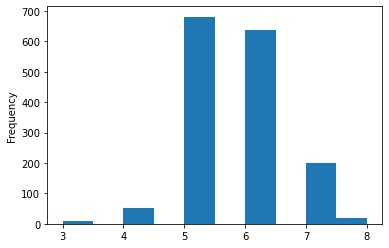

In [4]:
# here we can confirm that the most frequent outputs are grades 5 and 6 for quality.
df["quality"].plot(kind="hist")

<AxesSubplot:>

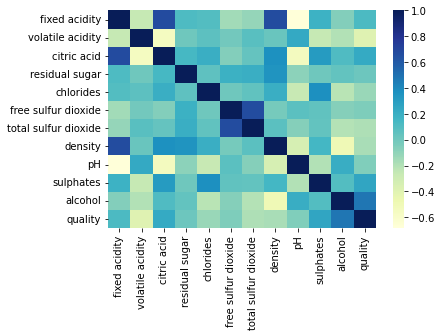

In [5]:
"""
seeing the heatmap to find correlations,
the 4 features with more relation with our target (quality) is:
"fixed acidity", "citric acid", "sulphates" and "alcohol"

""" 

sns.heatmap(df.corr(), cmap="YlGnBu")

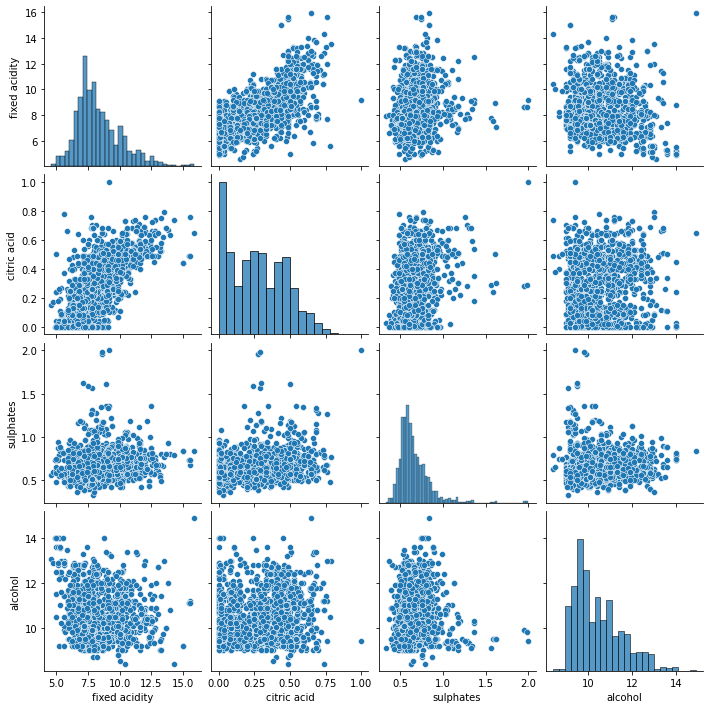

In [6]:
# exploring the features and understanding the relationship between then.
sns.pairplot(df.filter(items=['fixed acidity', 'citric acid', 'sulphates', 'alcohol']))

# ML - Splitting the data into train and test

In [7]:
# the inputs
X = df.drop("quality", axis=1)
# and the output
y = df["quality"]

In [8]:
X.shape

(1599, 11)

In [9]:
y.shape

(1599,)

In [10]:
# now let's divide our data, I will use 20% as test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [11]:
X_train.shape

(1279, 11)

In [12]:
X_test.shape

(320, 11)

Total Accuracy: 0.51875


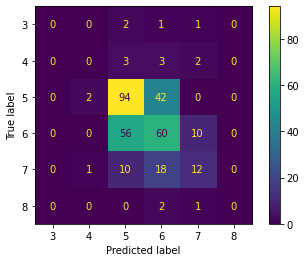

In [13]:
"""

the KNN with value of k=5 achieves a resonably good result. but it's far from ideal.

"""

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"Total Accuracy: {accuracy}")
cm = confusion_matrix(y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()



Total Accuracy: 0.475


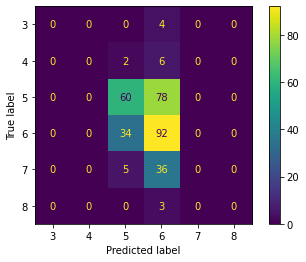

In [14]:
"""

SVM basically risked that all data would have output 5 or 6. 
being the most frequent, the attempt was good, but not efficient.

"""

clf = svm.SVC()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"Total Accuracy: {accuracy}")

cm = confusion_matrix(y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()



Total Accuracy: 0.66875


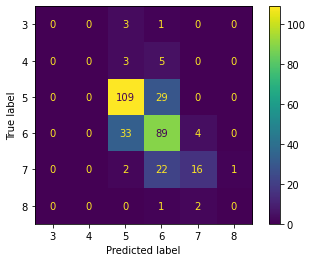

In [15]:
"""

looking at the confusion matrix, 
we see that the Random Forest managed to be efficient in finding the most frequent values. 
while it is less effective with rarer values

"""

clf = RandomForestClassifier(random_state=77)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"Total Accuracy: {accuracy}")
cm = confusion_matrix(y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()